In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)


[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


In [5]:
str_vmin = np.asarray([5.8,6.0,5.2,3.5,3.2,3.2,3.3,2.2])
str_vmax = np.asarray([9.2,9.2,8.7,8.3,8.0,8.0,8.0,8.0])
gas_vmin = np.asarray([6.0,5.5,5.7,4.8,4.7,5.0,4.7,4.5])
gas_vmax = np.asarray([8.0,7.5,7.5,7.5,7.4,7.2,7.3,7.3])
drk_vmin = np.asarray([6.7,6.7,6.2,6.0,5.5,5.7,5.6,5.6])
drk_vmax = np.asarray([9.3,9.0,8.7,8.8,8.7,8.7,8.5,8.5])

### Subhalos 000 al 009

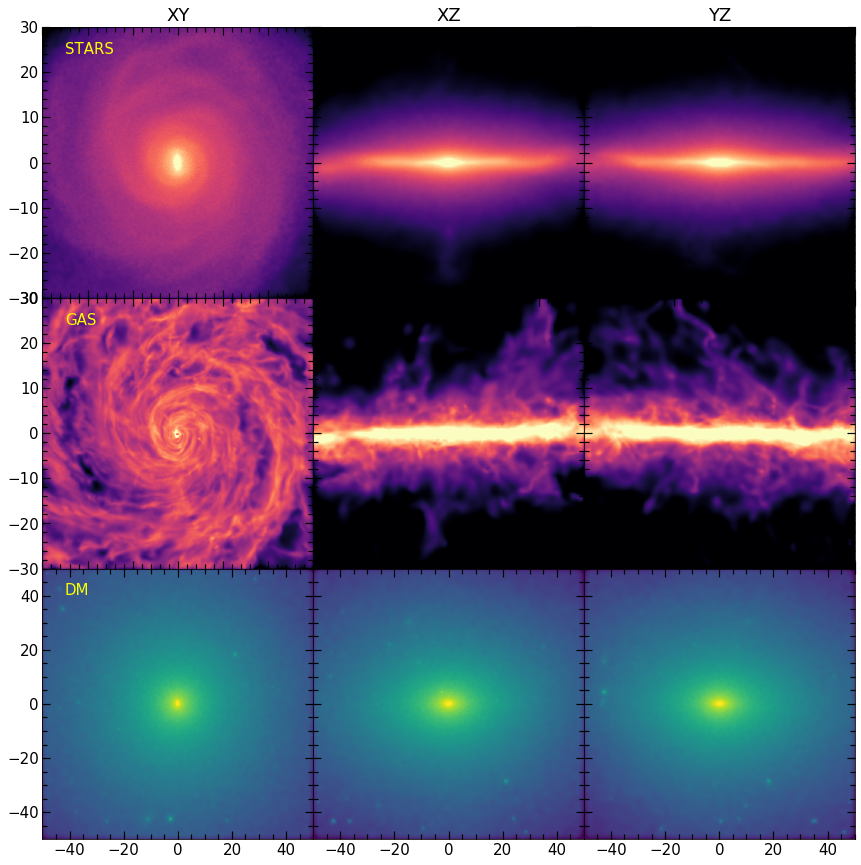

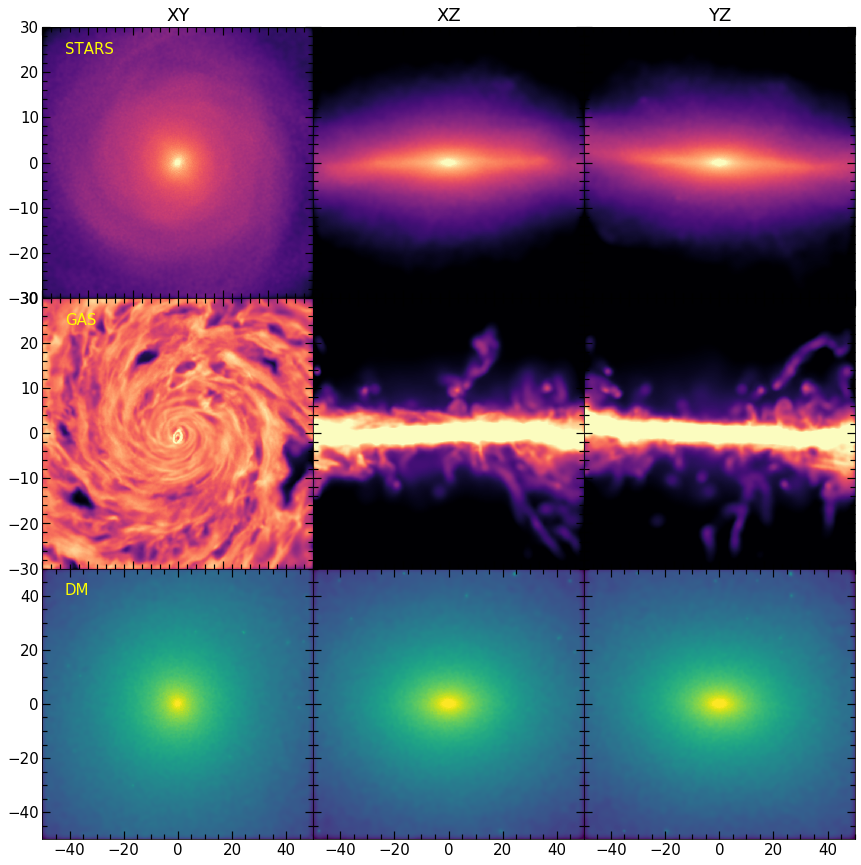

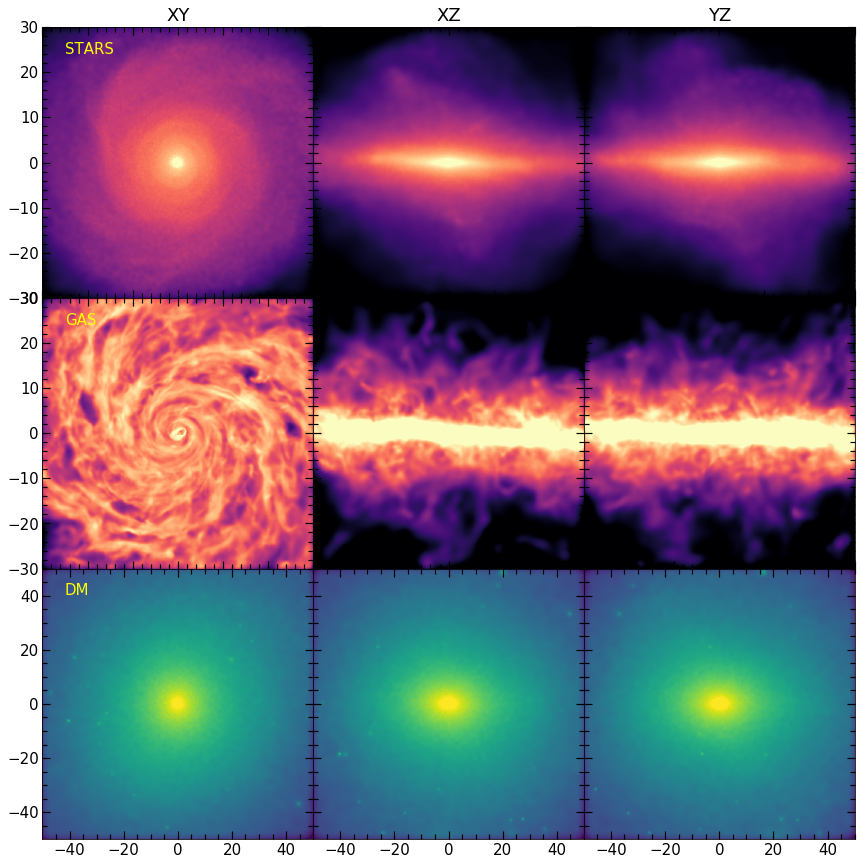

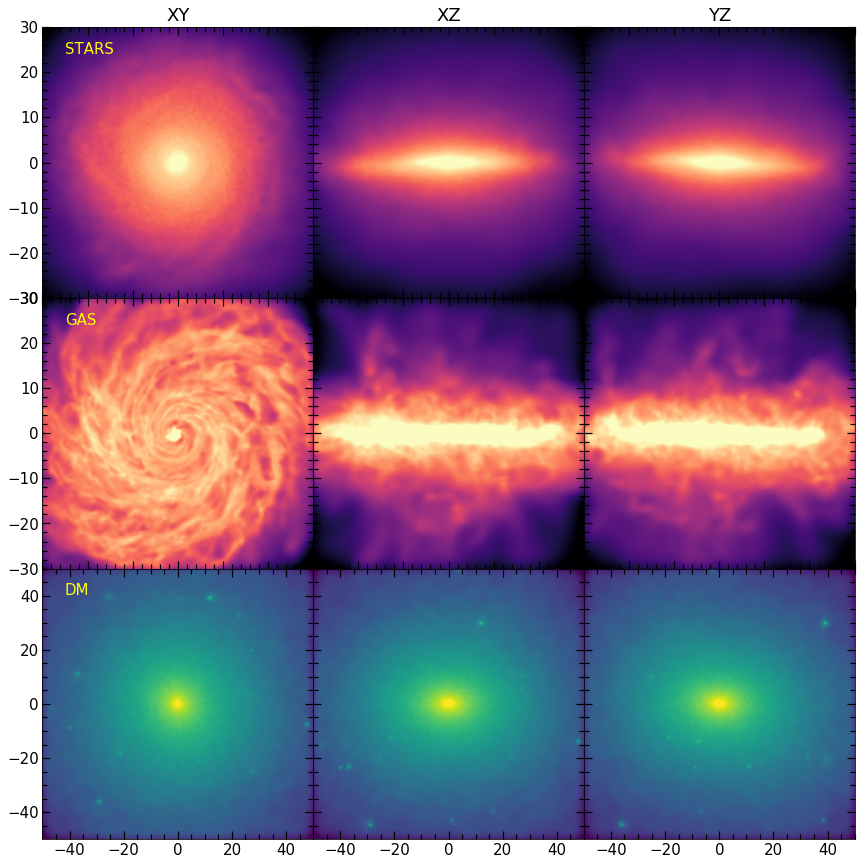

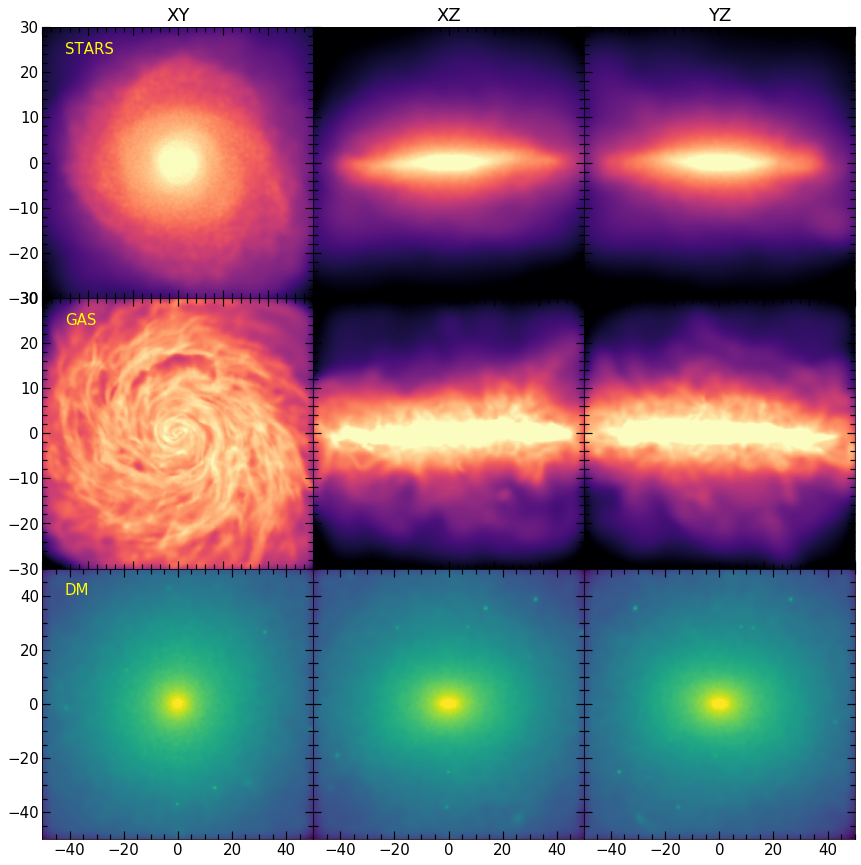

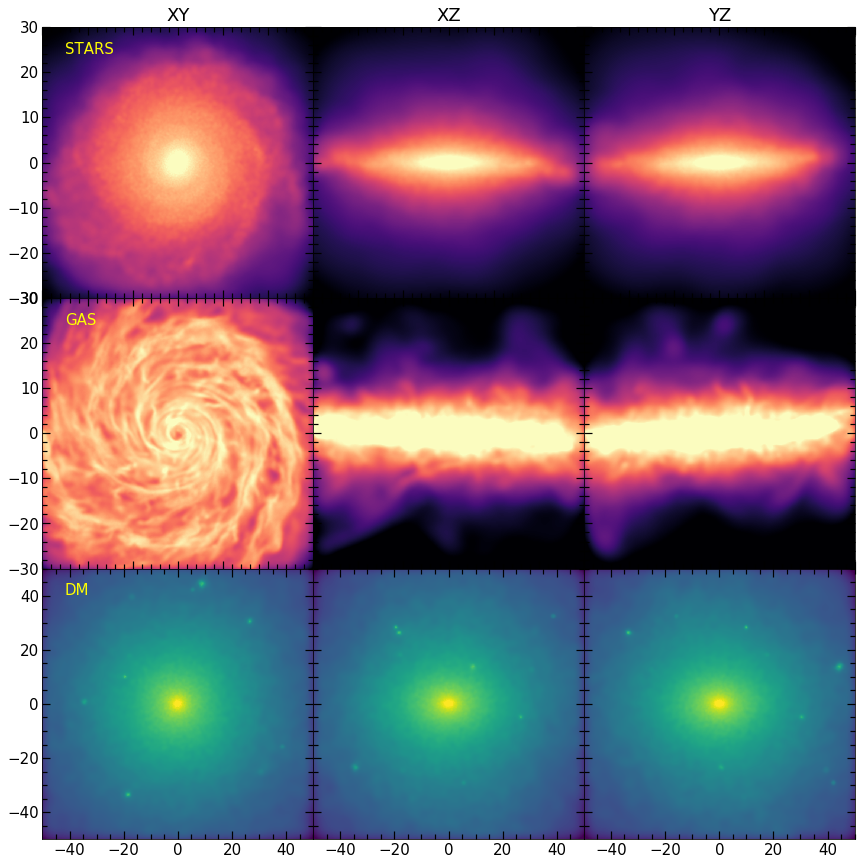

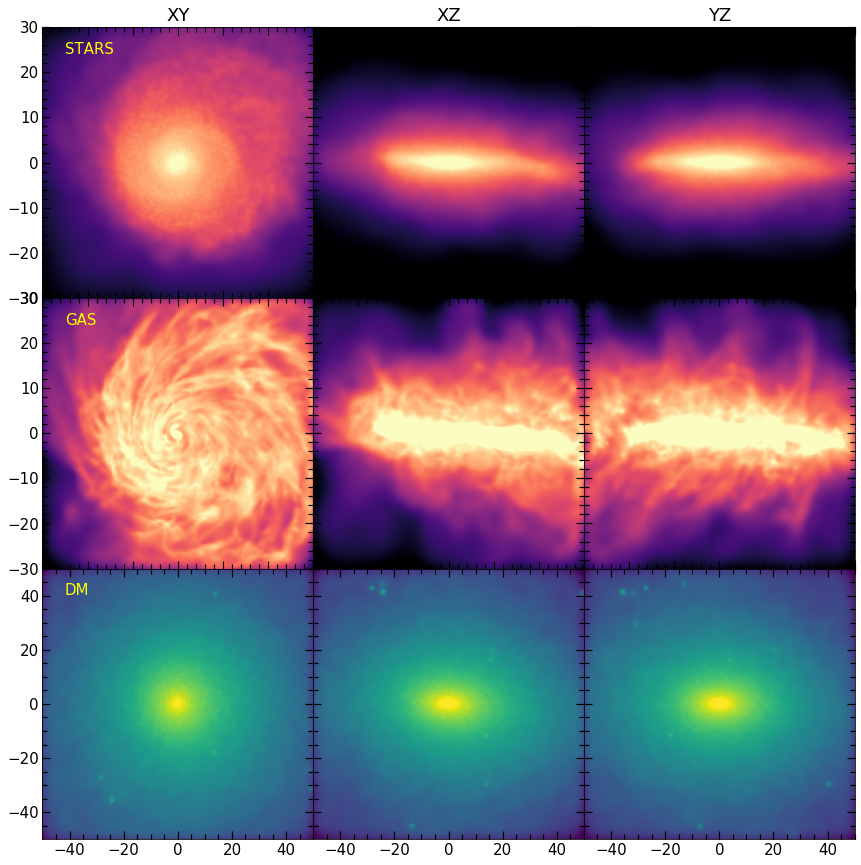

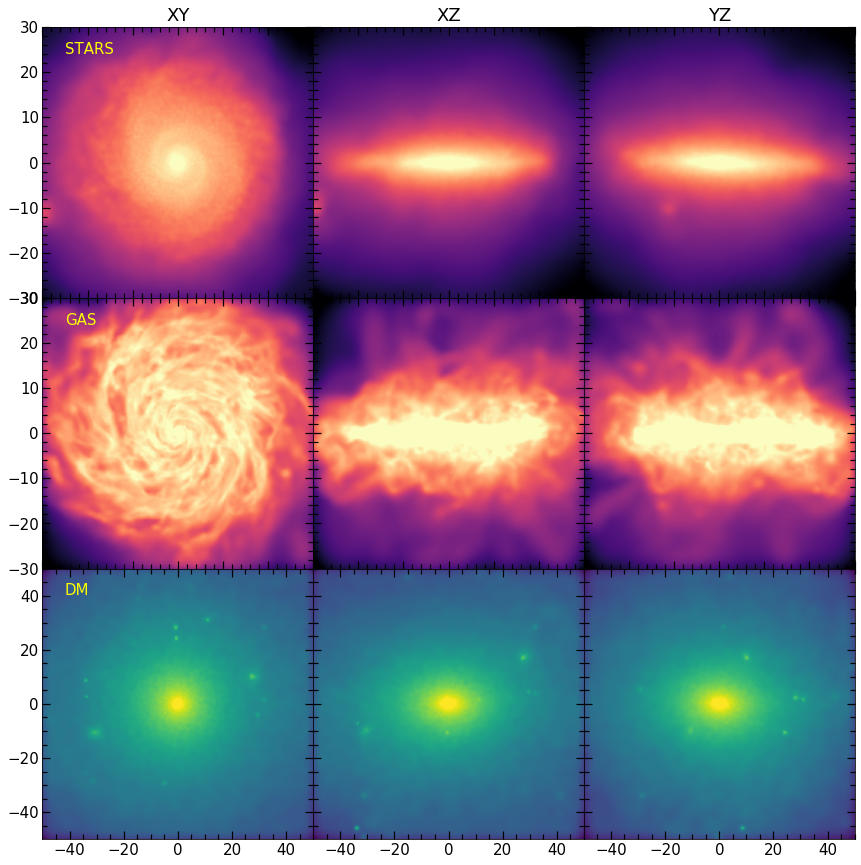

In [6]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import sphviewer as sph
from mpl_toolkits.axes_grid1 import make_axes_locatable

path = '/z/omarioni/gradients/_simulations/snap_127/'

i = 0
for j in subh_ind[:8]:

    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]


    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]*aexp/h
    ystr = pstr[:,1]*aexp/h
    zstr = pstr[:,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vstr[:,0] *np.sqrt(aexp)
    v_y = vstr[:,1] *np.sqrt(aexp)
    v_z = vstr[:,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr/h
    mgas = mgas/h
    mdrk = mdrk/h


    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,4)

    # posiciones de particulas que se quiere graficar
    # como lo de arriba me da los versores hago las posiciones con esto 

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr

    xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
    yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
    zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

    xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
    yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
    zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


    pos_str  = np.ndarray([np.size(xn_str),4])
    pos_str[:,0] = xn_str
    pos_str[:,1] = yn_str
    pos_str[:,2] = zn_str
    pos_str[:,3] = mstr

    pos_gas  = np.ndarray([np.size(xn_gas),4])
    pos_gas[:,0] = xn_gas
    pos_gas[:,1] = yn_gas
    pos_gas[:,2] = zn_gas
    pos_gas[:,3] = mgas

    pos_drk = np.ndarray([np.size(xn_drk),4])
    pos_drk[:,0] = xn_drk
    pos_drk[:,1] = yn_drk
    pos_drk[:,2] = zn_drk
    pos_drk[:,3] = mdrk


    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

    fig.subplots_adjust(bottom=0.01, left =0.03, right = 0.97, top = 0.95, wspace=0.0, hspace= 0.0)

    #----------------------------------------------------------------------
    #---------------------generador del grafico1-----------------
    rl= 30   
    corte,=np.where((xn_str <rl) & (yn_str <rl) & (zn_str <rl) & (xn_str >-rl) & (yn_str >-rl) & (zn_str >-rl))

    #-----rango que tiene la escala  de colores-----
    vmin=str_vmin[i]
    vmax=str_vmax[i]
    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='magma'

    nb1 = 50
    #         nb1 = 100 
    #         npixel = 1000
    npixel = 1000

    particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
    rend0=sph.Render(escena)
    extent=escena.get_extent()
    rend0.set_logscale()

    ax[0,0].imshow(rend0.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,0].set_xlim(-30,30)
    ax[0,0].set_ylim(-30,30)
    #     ax[0,0].set_xticks([])
    #     ax[0,0].set_yticks([])
    #     ax[0,0].set_yticklabels([])
    ax[0,0].set_xticklabels([])
    ax[0,0].text(-25, 25, 'STARS', fontsize=15, color='yellow', ha='left', va='center') 
    ax[0,0].set_title('XY', loc='center', fontsize=18)
    ax[0,0].minorticks_on()
    ax[0,0].tick_params( labelsize=15)
    ax[0,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[0,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
   


    #--------------------------------------
    particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    # ax[0,0]=fig.add_subplot(221)
    ax[0,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[0,1].set_xlim(-30,30)
    ax[0,1].set_ylim(-30,30)
    #     ax[0,1].set_xticks([])
    #     ax[0,1].set_yticks([])
    ax[0,1].set_xticklabels([])
    ax[0,1].set_yticklabels([])
    ax[0,1].set_title('XZ', loc='center', fontsize=18)
    ax[0,1].minorticks_on()
    ax[0,1].tick_params( labelsize=15)
    ax[0,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[0,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')

    #--------------------------------------
    particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90, t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    ax[0,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap,vmin=vmin, vmax=vmax)
    ax[0,2].set_xlim(-30,30)
    ax[0,2].set_ylim(-30,30)
    #     ax[0,2].set_xticks([])
    #     ax[0,2].set_yticks([])
    ax[0,2].set_xticklabels([])
    ax[0,2].set_yticklabels([])
    ax[0,2].set_title('YZ', loc='center', fontsize=18)
    ax[0,2].minorticks_on()
    ax[0,2].tick_params( labelsize=15)
    ax[0,2].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[0,2].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')

    #--------------------------------------------------------------------------------------------------------
    #---------------------generador del grafico2-----------------
    rl= 30   
    corte,=np.where((xn_gas <rl) & (yn_gas <rl) & (zn_gas <rl) & (xn_gas >-rl) & (yn_gas >-rl) & (zn_gas >-rl))


    #-----rango que tiene la escala  de colores-----
    vmin=gas_vmin[i]
    vmax=gas_vmax[i]

    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='magma'

    #         nb1 = 100 
    nb1 = 50
    npixel = 1000

    particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
    rend1=sph.Render(escena)
    extent=escena.get_extent()
    rend1.set_logscale()

    ax[1,0].imshow(rend1.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,0].set_xlim(-30,30)
    ax[1,0].set_ylim(-30,30)
    #     ax[1,0].set_xticks([])
    #     ax[1,0].set_yticks([])
    #     ax[1,0].set_yticklabels([])
    ax[1,0].set_xticklabels([])
    ax[1,0].text(-25, 25, 'GAS', fontsize=15, color='yellow', ha='left', va='center') 
    ax[1,0].minorticks_on()
    ax[1,0].tick_params( labelsize=15)
    ax[1,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[1,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')

    #--------------------------------------
    particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[1,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,1].set_xlim(-30,30)
    ax[1,1].set_ylim(-30,30)
    #     ax[1,1].set_xticks([])
    #     ax[1,1].set_yticks([])
    ax[1,1].set_xticklabels([])
    ax[1,1].set_yticklabels([])
    ax[1,1].minorticks_on()
    ax[1,1].tick_params( labelsize=15)
    ax[1,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[1,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')
    

    #--------------------------------------
    particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], p=90,t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[1,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[1,2].set_xlim(-30,30)
    ax[1,2].set_ylim(-30,30)
    #     ax[1,2].set_xticks([])
    #     ax[1,2].set_yticks([])
    ax[1,2].set_xticklabels([])
    ax[1,2].set_yticklabels([])
    ax[1,2].minorticks_on()
    ax[1,2].tick_params( labelsize=15)
    ax[1,2].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[1,2].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')

    #--------------------------------------------------------------------------------------------------------
    #---------------------generador del grafico3-----------------
    rl= 50   
    corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))


    #-----rango que tiene la escala  de colores-----
    vmin=drk_vmin[i]
    vmax=drk_vmax[i]

    # ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='viridis'

    #         nb1 = 300 
    nb1 = 50
    npixel = 1000

    particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
    rend2=sph.Render(escena)
    extent=escena.get_extent()
    rend2.set_logscale()

    ax[2,0].imshow(rend2.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[2,0].set_xlim(-50,50)
    ax[2,0].set_ylim(-50,50)
    ax[2,0].text(-42, 42, 'DM', fontsize=15, color='yellow', ha='left', va='center') 
    ax[2,0].minorticks_on()
    ax[2,0].tick_params( labelsize=15)
    ax[2,0].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[2,0].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')


    #--------------------------------------
    particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[2,1].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[2,1].set_xlim(-50,50)
    ax[2,1].set_ylim(-50,50)
    #     ax[2,1].set_xticks([])
    #     ax[2,1].set_yticks([])
    #     ax[2,1].set_xticklabels([])
    ax[2,1].set_yticklabels([])
    ax[2,1].minorticks_on()
    ax[2,1].tick_params( labelsize=15)
    ax[2,1].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[2,1].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')

    #--------------------------------------
    particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90,p=90, xsize=npixel,ysize=npixel)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()


    ax[2,2].imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    ax[2,2].set_xlim(-50,50)
    ax[2,2].set_ylim(-50,50)
    #     ax[2,2].set_xticks([])
    #     ax[2,2].set_yticks([])
    #     ax[2,2].set_xticklabels([])
    ax[2,2].set_yticklabels([])
    ax[2,2].minorticks_on()
    ax[2,2].tick_params( labelsize=15)
    ax[2,2].tick_params('both', length=5, width=1.2,which='minor', direction='in', right='on',top='on')
    ax[2,2].tick_params('both', length=8, width=1.2,which='major', direction='in', right='on',top='on')   
    
    plt.show()
    
    path2 = '/z/omarioni/gradients/_imagenes/mass_density/'
    fig.savefig(path2 + 'subhalo_'+str('%03d'%j)+'.png', dpi = 100, xxbox_inches='tight')

    plt.close()
    
    i = i+1

In [18]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import sphviewer as sph
from mpl_toolkits.axes_grid1 import make_axes_locatable

path = '/z/omarioni/gradients/_simulations/snap_127/'


for j in subh_ind[7:8]:

    snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

    aexp = snap['/Time'][()]
    h    = snap['/h'][()]

    pstr = snap['/Str/Coordinates'][()]
    mstr = snap['/Str/Masses'][()]
    vstr = snap['/Str/Velocities'][()]

    pgas = snap['/Gas/Coordinates'][()]
    mgas = snap['/Gas/Masses'][()]

    pdrk = snap['/Drk/Coordinates'][()]
    mdrk = snap['/Drk/Masses'][()]


    #---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = pstr[:,0]*aexp/h
    ystr = pstr[:,1]*aexp/h
    zstr = pstr[:,2]*aexp/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = pgas[:,0]*aexp/h
    ygas = pgas[:,1]*aexp/h
    zgas = pgas[:,2]*aexp/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = pdrk[:,0]*aexp/h
    ydrk = pdrk[:,1]*aexp/h
    zdrk = pdrk[:,2]*aexp/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vstr[:,0] *np.sqrt(aexp)
    v_y = vstr[:,1] *np.sqrt(aexp)
    v_z = vstr[:,2] *np.sqrt(aexp)

    #----------------------masas----------------------------
    mstr = mstr/h
    mgas = mgas/h
    mdrk = mdrk/h


    veloc,=np.where(rstr < 3)

    #----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,4)

    # posiciones de particulas que se quiere graficar
    # como lo de arriba me da los versores hago las posiciones con esto 

    xn_str = e1x*xstr + e1y*ystr + e1z*zstr
    yn_str = e2x*xstr + e2y*ystr + e2z*zstr
    zn_str = e3x*xstr + e3y*ystr + e3z*zstr

    xn_gas = e1x*xgas + e1y*ygas + e1z*zgas
    yn_gas = e2x*xgas + e2y*ygas + e2z*zgas
    zn_gas = e3x*xgas + e3y*ygas + e3z*zgas

    xn_drk = e1x*xdrk + e1y*ydrk + e1z*zdrk
    yn_drk = e2x*xdrk + e2y*ydrk + e2z*zdrk
    zn_drk = e3x*xdrk + e3y*ydrk + e3z*zdrk


    pos_str  = np.ndarray([np.size(xn_str),4])
    pos_str[:,0] = xn_str
    pos_str[:,1] = yn_str
    pos_str[:,2] = zn_str
    pos_str[:,3] = mstr

    pos_gas  = np.ndarray([np.size(xn_gas),4])
    pos_gas[:,0] = xn_gas
    pos_gas[:,1] = yn_gas
    pos_gas[:,2] = zn_gas
    pos_gas[:,3] = mgas

    pos_drk = np.ndarray([np.size(xn_drk),4])
    pos_drk[:,0] = xn_drk
    pos_drk[:,1] = yn_drk
    pos_drk[:,2] = zn_drk
    pos_drk[:,3] = mdrk
   

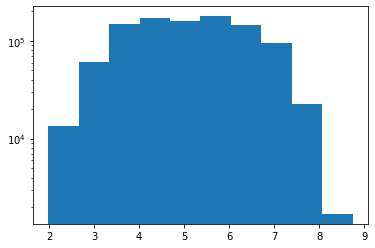

In [19]:
rl= 30   
corte,=np.where((xn_str <rl) & (yn_str <rl) & (zn_str <rl) & (xn_str >-rl) & (yn_str >-rl) & (zn_str >-rl))

nb1 = 50
npixel = 1000

particles=sph.Particles(pos_str[corte,:3],mstr[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend0=sph.Render(escena)
rend0.set_logscale()
rend0.histogram(log=True)

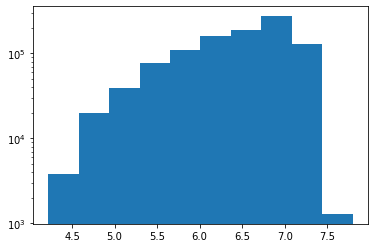

In [20]:
rl= 30   
corte,=np.where((xn_gas <rl) & (yn_gas <rl) & (zn_gas <rl) & (xn_gas >-rl) & (yn_gas >-rl) & (zn_gas >-rl))

nb1 = 50
npixel = 1000

particles=sph.Particles(pos_gas[corte,:3],mgas[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend1=sph.Render(escena)
rend1.set_logscale()
rend1.histogram(log=True)

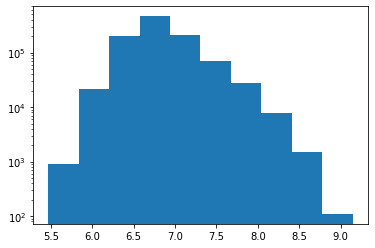

In [21]:
rl= 50   
corte,=np.where((xn_drk <rl) & (yn_drk <rl) & (zn_drk <rl) & (xn_drk >-rl) & (yn_drk >-rl) & (zn_drk >-rl))

nb1 = 50
npixel = 1000

particles=sph.Particles(pos_drk[corte,:3],mdrk[corte]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], xsize=npixel,ysize=npixel)
rend2=sph.Render(escena)
rend2.set_logscale()
rend2.histogram(log=True)